### Numpy array vs Python lists

Two most important advantages of numpy over python list -
1. Python list is dynamic - every time you insert an element the size well increase to double | Numpy array are static

2. As numpy arrays are C arrays - The elements can directly store in memory but | In python list the referance are stored in memory

In [2]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

4.69896388053894


In [3]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.319699764251709


In [ ]:
3.26/0.06

54.33333333333333

In [ ]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [ ]:
a = np.arange(10000000,dtype=np.int8)
print(a[len(a)-1])
sys.getsizeof(a)

127


10000112

What is the advantage of list over numpy arrays
--> it can store non homogonous elements

**Advanced Indexing**

In [ ]:
# Normal Indexing and slicing
a = np.arange(24).reshape(6,4)
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

**Fancy Indexing - Mostly used for selecting columns in pandas**

In [ ]:
# Fancy Indexing
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [ ]:
a[[0,2,3], 0:4:2]

array([[ 0,  2],
       [ 8, 10],
       [12, 14]])

**Boolen Indexing**

In [4]:
a = np.random.randint(1, 100, size = (6,4))
a

array([[18, 47, 64, 98],
       [35, 18, 24, 21],
       [75, 32, 84, 65],
       [84, 18, 97, 52],
       [95, 42, 99,  1],
       [17,  5, 75, 67]])

In [ ]:
# Find all numbers greater than 50 and those are even
a[(a > 50) & (a % 2 == 0)]

array([74, 72, 56, 62, 70, 78])

In [ ]:
# find all numbers greater than 50
a[a > 50]

array([76, 98, 99, 91, 88, 83, 78, 85, 54, 73, 61, 53, 93, 85, 77])

In [ ]:
# find out even numbers
a[a % 2 == 0]

array([76, 98, 46, 88,  6, 78, 54, 40])

In [5]:
# find all numbers greater than 50 and are even
a[(a > 50) & (a % 2 == 0)]

array([64, 98, 84, 84, 52])

In [ ]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([76, 99, 39, 46, 88, 23, 45,  6, 83,  1, 37, 43, 78, 85, 54, 73, 61,
       53, 40, 93, 85])

**Broadcasting**

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [6]:
a1 = np.arange(1, 13).reshape(4, 3)
print(a1)
a2 = np.arange(1, 7).reshape(2, 3)
print(a2)

a1 + a2 # 3rd rule of broadcasting

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[1 2 3]
 [4 5 6]]


ValueError: operands could not be broadcast together with shapes (4,3) (2,3) 

In [ ]:
a1 = np.arange(1, 13).reshape(4, 3)
print(a1)
a2 = np.array([1, 2])
print(a2)

a1 + a2 # This also cannot get addded as a single dimention does not match the others dimention

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[1 2]


ValueError: operands could not be broadcast together with shapes (4,3) (2,) 

In [ ]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [ ]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [ ]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: ignored

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [ ]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: ignored

In [ ]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: ignored

*Interview Question
Use of Broadcasting - Vectorization
Numpy internally avoide loops so they created new technique called vectorization*

**Working with mathematical formulas**

In [ ]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
# sigmoid
def sigmoid(array):
  return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [ ]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

500.12

In [ ]:
np.mean((actual - predicted)**2)

500.12

In [ ]:
actual

array([ 5,  3,  9,  7,  3, 36, 49, 28, 20, 40,  2, 23, 29, 18, 30, 23,  7,
       40, 15, 11, 27, 44, 32, 28, 10])

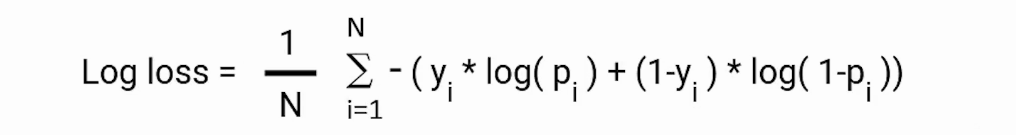

In [5]:
# binary cross entropy
# def BinaryCrossEntropy(y_true, y_pred):
#     y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
#     print(y_pred)
#     term_0 = (1-y_true) * np.log(1-y_pred + 1e-7)
#     term_1 = y_true * np.log(y_pred + 1e-7)
#     return -np.mean(term_0+term_1, axis=0)

# print(BinaryCrossEntropy(np.array([1, 1, 1]).reshape(-1, 1),
#                          np.array([1, 1, 0]).reshape(-1, 1)))


def bce(y_actual, y_predicted):
  term0 = y_actual * (np.log(y_predicted))
  term1 = (1-y_actual) * (np.log(1-y_predicted))
  return -np.mean(term0 + term1)

print(bce(np.array([0.1, 0.2, 0.3]).reshape(-1, 1), np.array([0.1, 0.2, 0.1]).reshape(-1, 1)))

0.5300044285961093


In [7]:
np.array([1, 91, 81]).reshape(-1, 1) # Here -1 is like len(array) - 1

array([[ 1],
       [91],
       [81]])

**Working with missing values**

In [ ]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [ ]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

**Plotting Graphs**

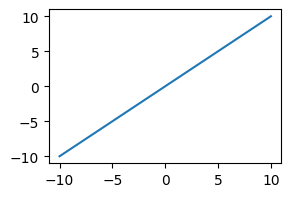

In [15]:
import matplotlib.pyplot as plt

plt.style.use('default')

x = np.linspace(-10,10,100)
y = x

plt.figure(figsize=(3,2))
plt.plot(x,y)
plt.show()

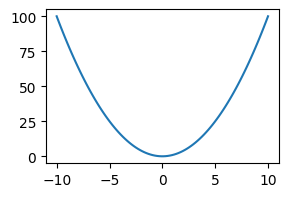

In [16]:
# y = x^2
plt.figure(figsize=(3,2))
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

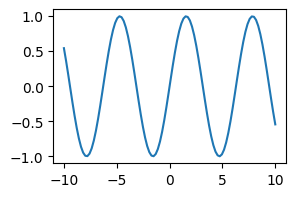

In [17]:
# y = sin(x)
plt.figure(figsize=(3,2))
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

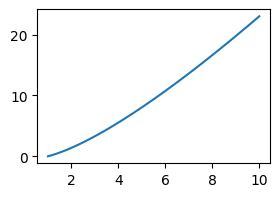

In [19]:
# y = xlog(x)
plt.figure(figsize=(3,2))
x = np.linspace(1,10,100)
y = x * np.log(x)

plt.plot(x,y)

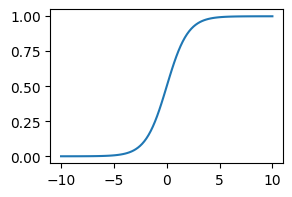

In [21]:
# sigmoid
plt.figure(figsize=(3,2))
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

**Meshgrids**

In [6]:
# Meshgrids
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

xx, yy = np.meshgrid(x, y)
yy

array([[-10.        , -10.        , -10.        , ..., -10.        ,
        -10.        , -10.        ],
       [ -9.97997998,  -9.97997998,  -9.97997998, ...,  -9.97997998,
         -9.97997998,  -9.97997998],
       [ -9.95995996,  -9.95995996,  -9.95995996, ...,  -9.95995996,
         -9.95995996,  -9.95995996],
       ...,
       [  9.95995996,   9.95995996,   9.95995996, ...,   9.95995996,
          9.95995996,   9.95995996],
       [  9.97997998,   9.97997998,   9.97997998, ...,   9.97997998,
          9.97997998,   9.97997998],
       [ 10.        ,  10.        ,  10.        , ...,  10.        ,
         10.        ,  10.        ]])